# Evaluation of the traffic light detection model - simulator images
This notebook is derived from the tutorial of Objecy Detection API

In [13]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

## Environment setup
Change the variables below to run notebook in your environment

In [14]:
# set up path to object detection libraries
OBJECT_DETECTION_API_PATH='/datadrive/models/research/object_detection'
sys.path.append(OBJECT_DETECTION_API_PATH)
sys.path.append(OBJECT_DETECTION_API_PATH+'/..')

# What model to download.
MODEL_DIR = '/datadrive/traffic_light_detector'
MODEL_NAME = 'fine_tuned_model_sim_out'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_DIR + '/' + MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(MODEL_DIR + '/data', 'label_mapping_lowercase.pbtxt')

## Object detection imports

In [15]:
from utils import label_map_util
from utils import visualization_utils as vis_util

# Model preparation 

## Load a (frozen) Tensorflow model into memory.

In [16]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when the model predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [17]:
# Number of classes detected by model
NUM_CLASSES = 3

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [18]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection
We test the model on 5 training images and 10 validation images

In [19]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '0.0_285.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, '10.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, '3.0_8.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, '4.0_872.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, '8.0_84.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0003.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0011.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0013.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0025.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0031.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0402.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0430.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0490.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left0821.jpg'),
                     os.path.join(PATH_TO_TEST_IMAGES_DIR, 'left1112.jpg')
                   ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

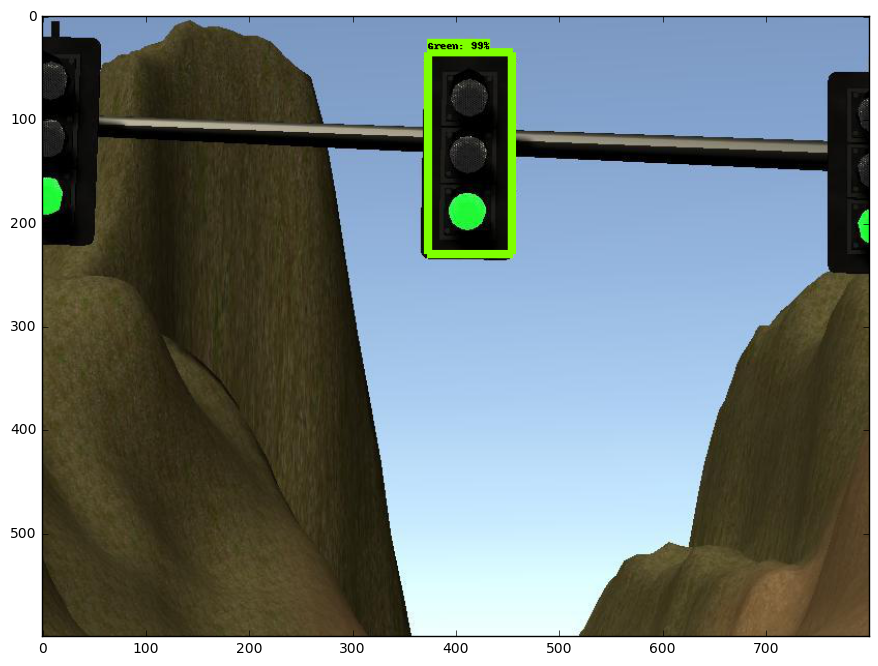

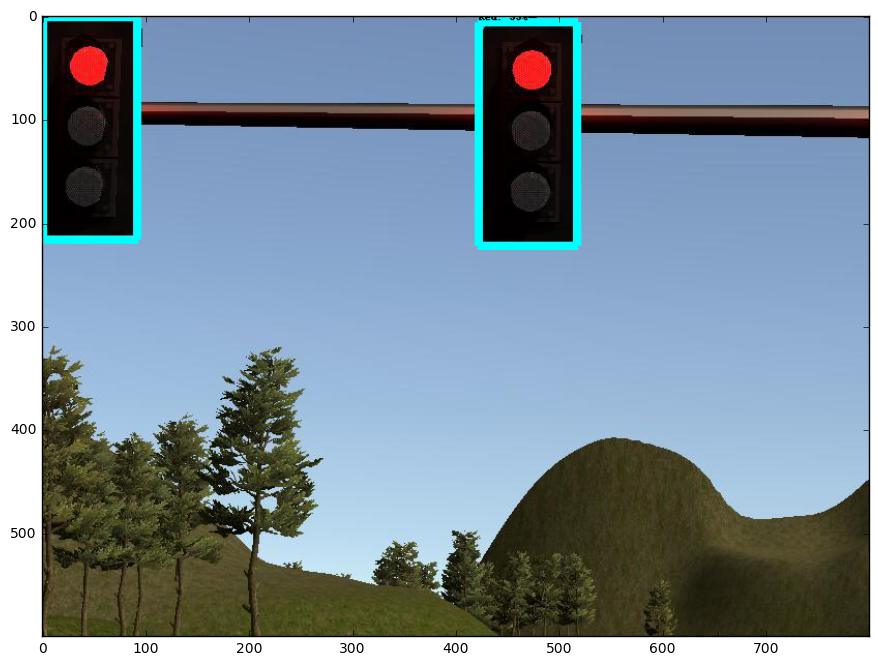

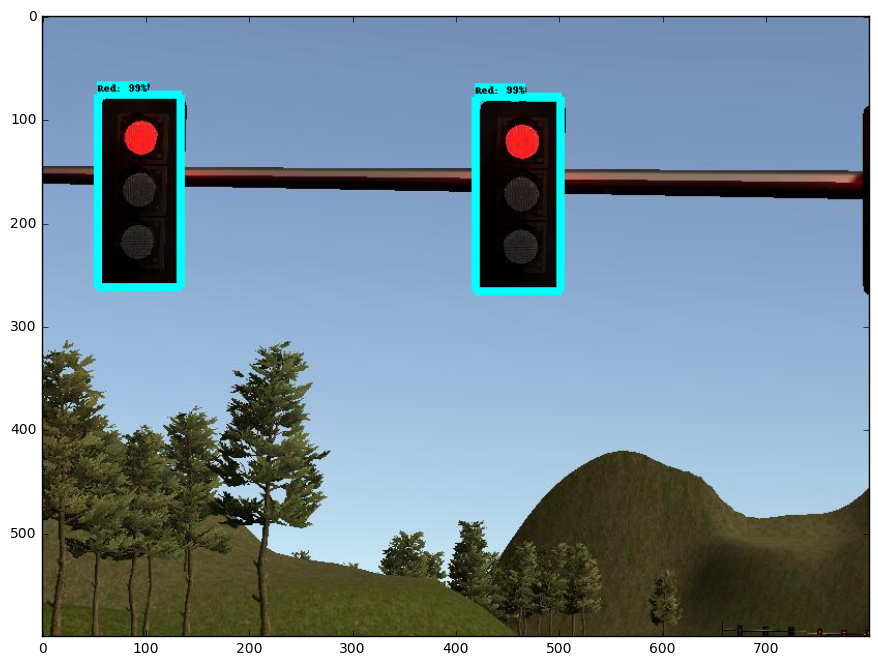

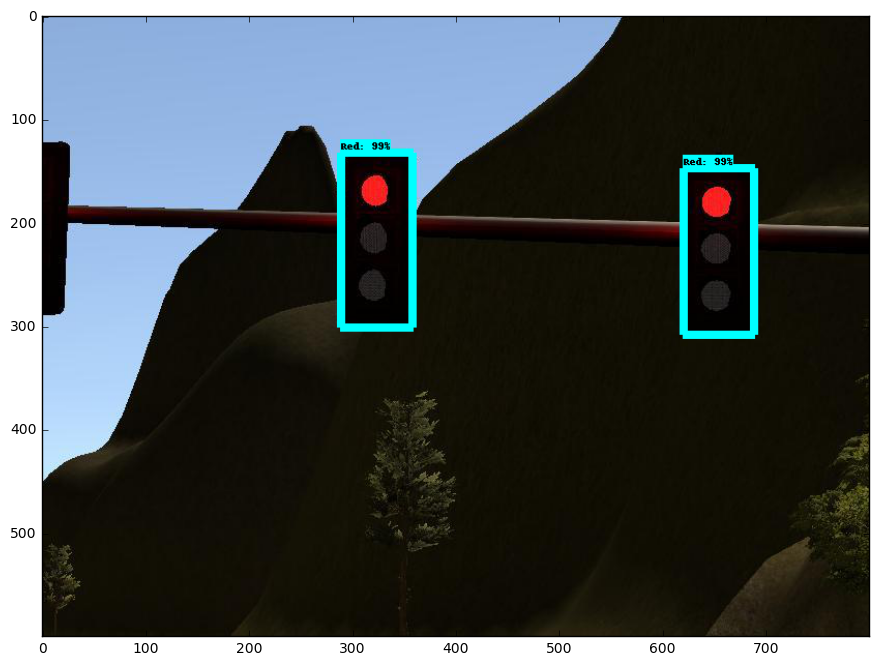

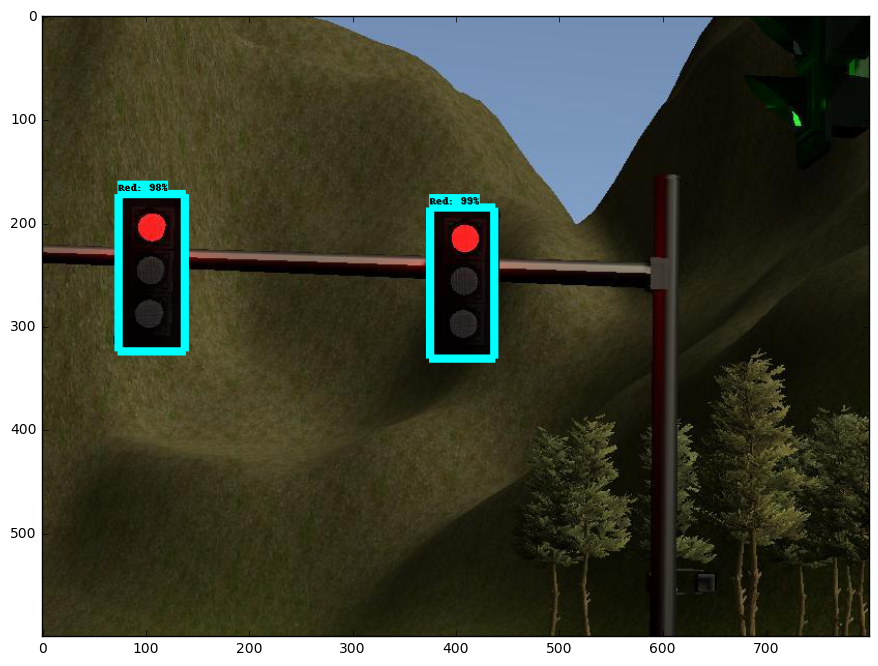

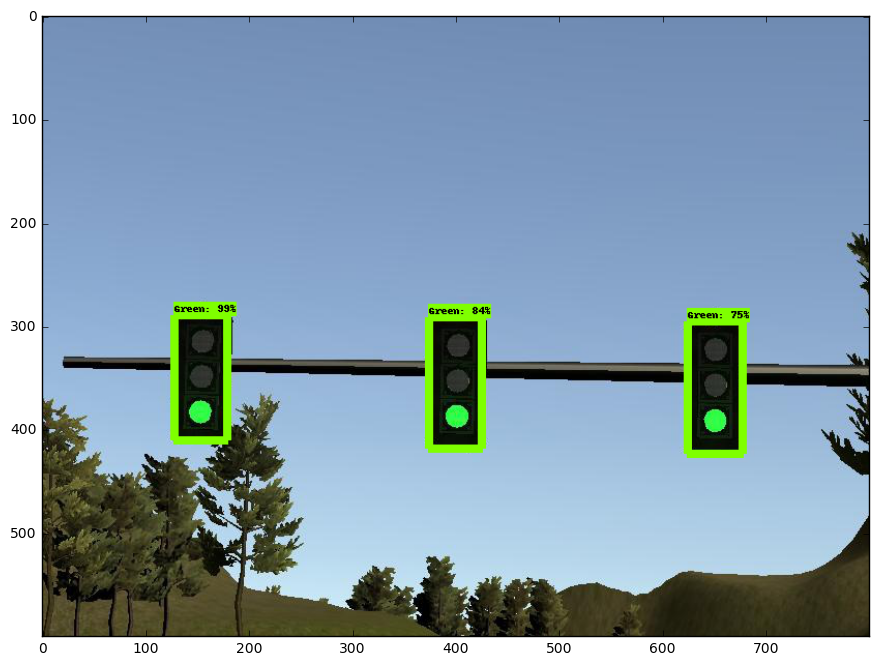

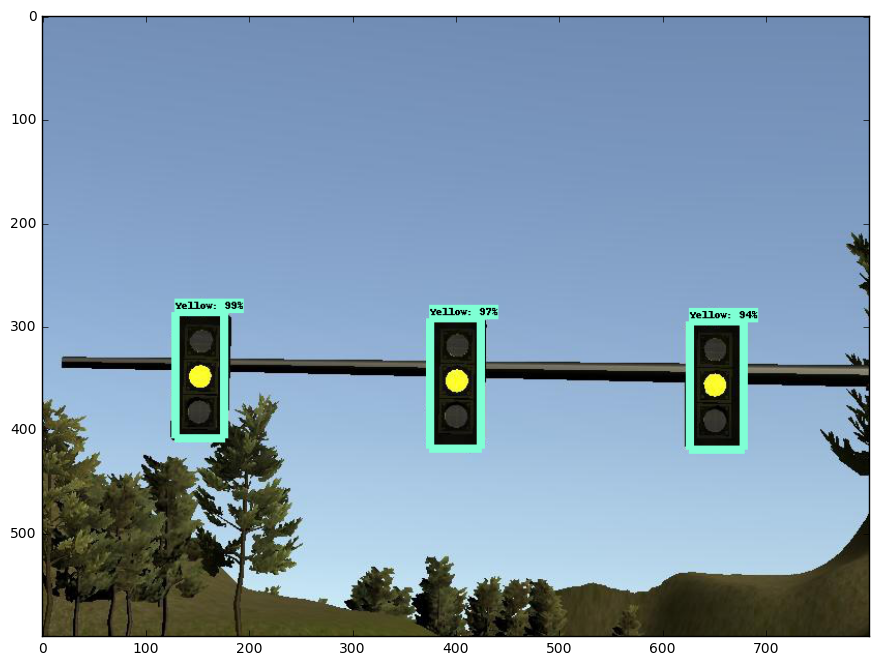

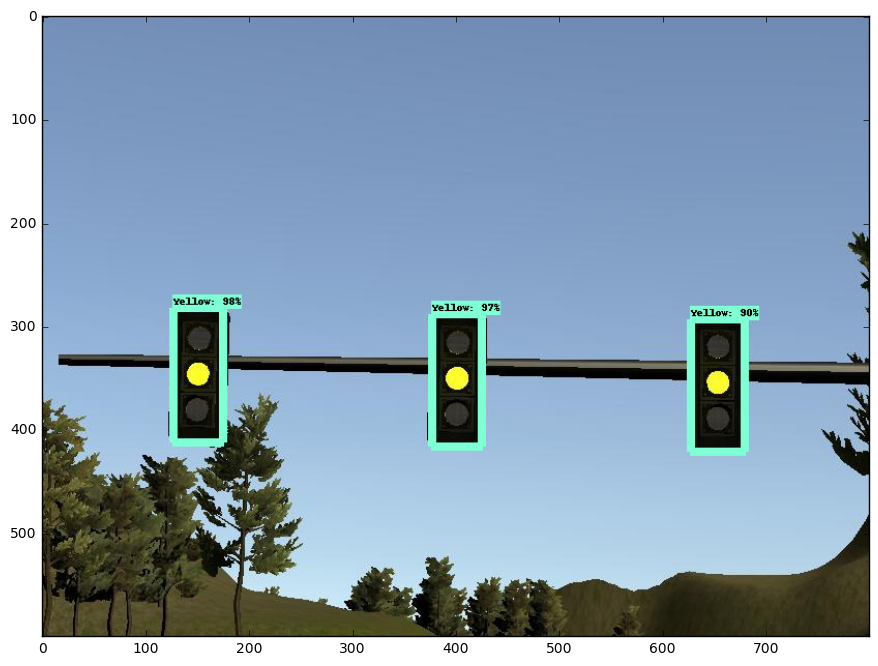

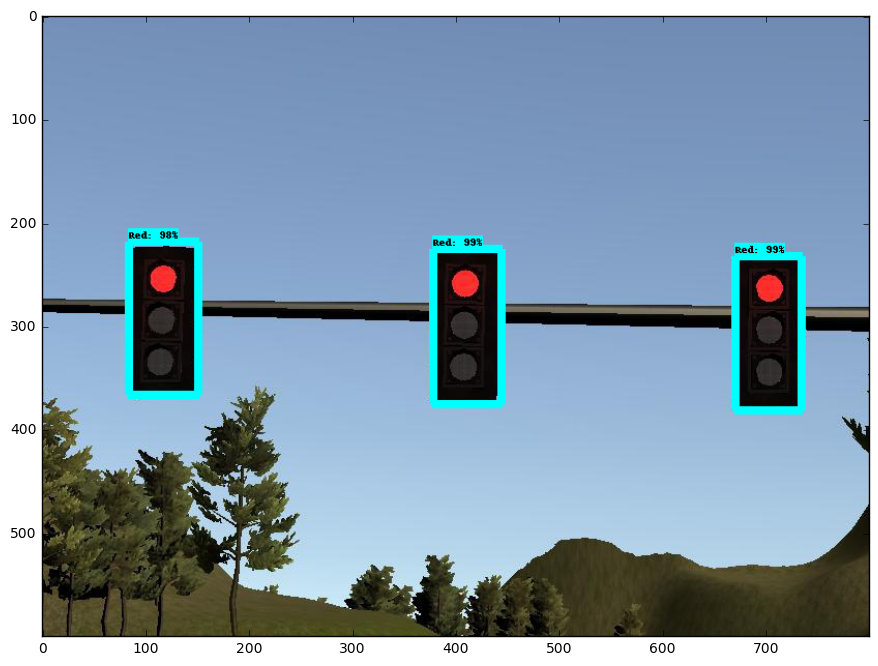

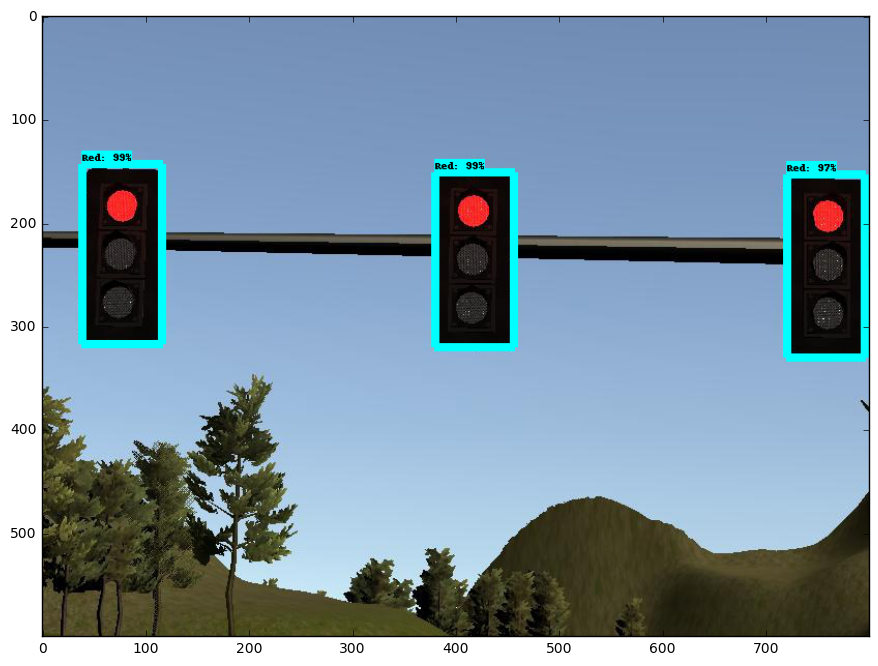

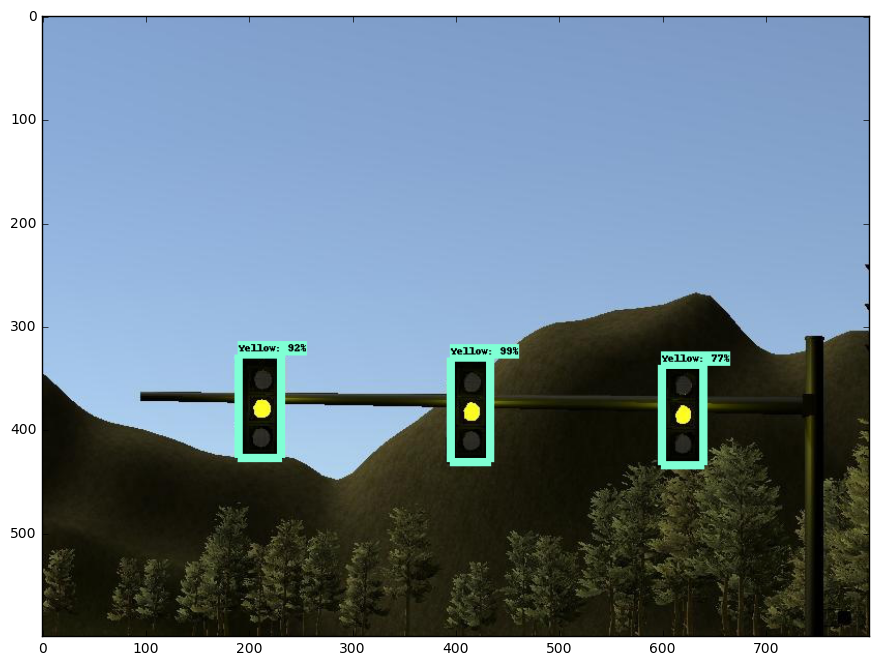

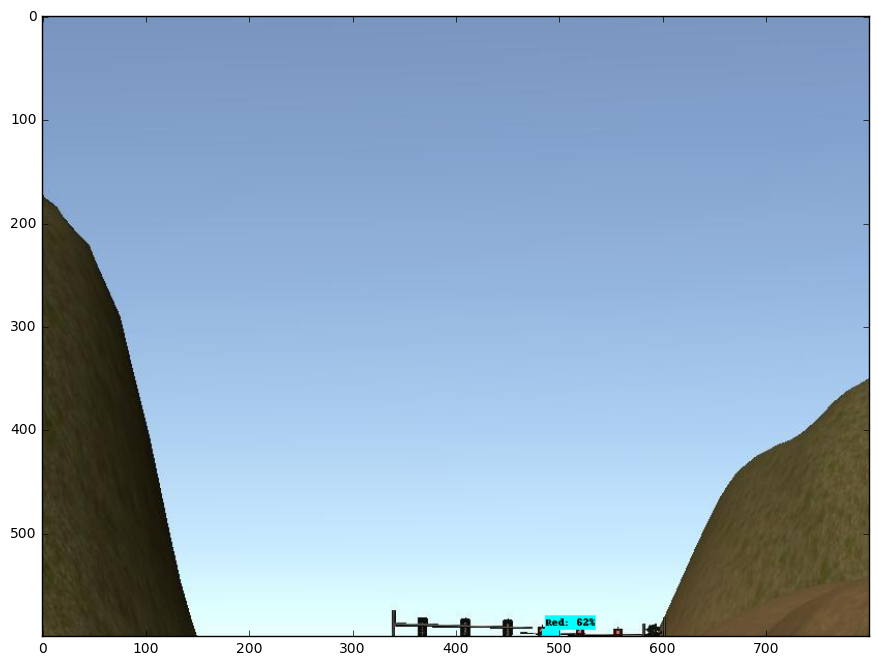

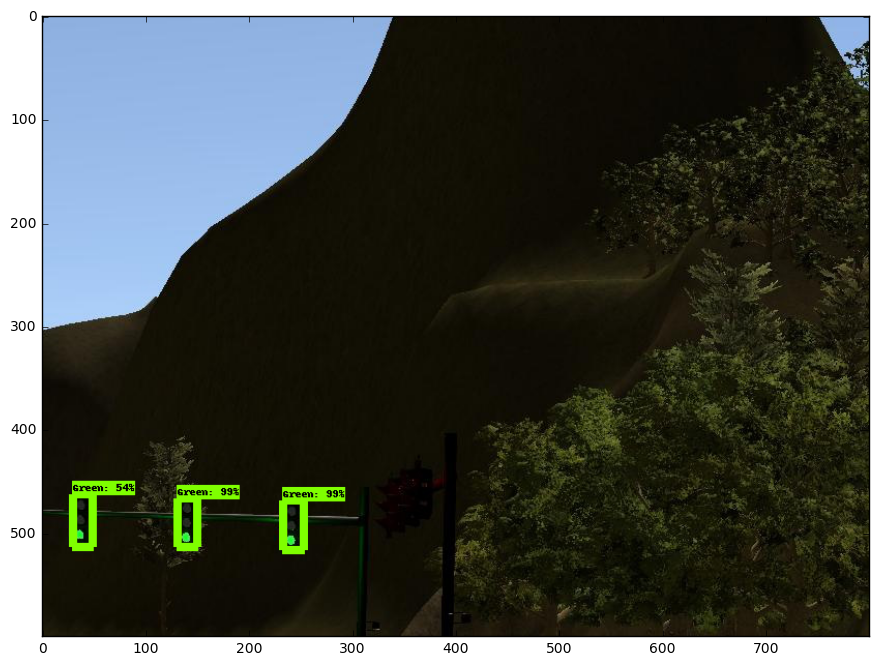

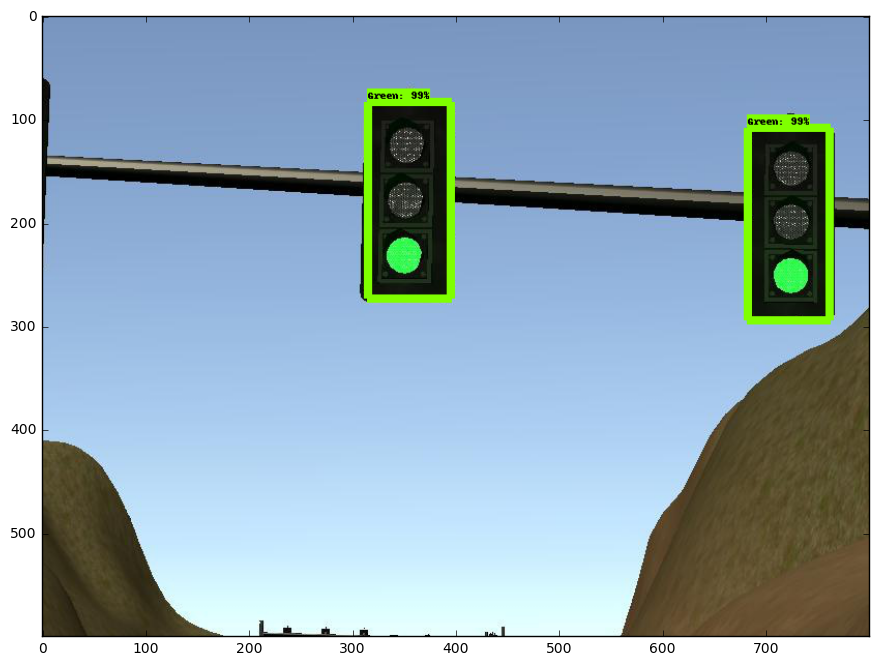

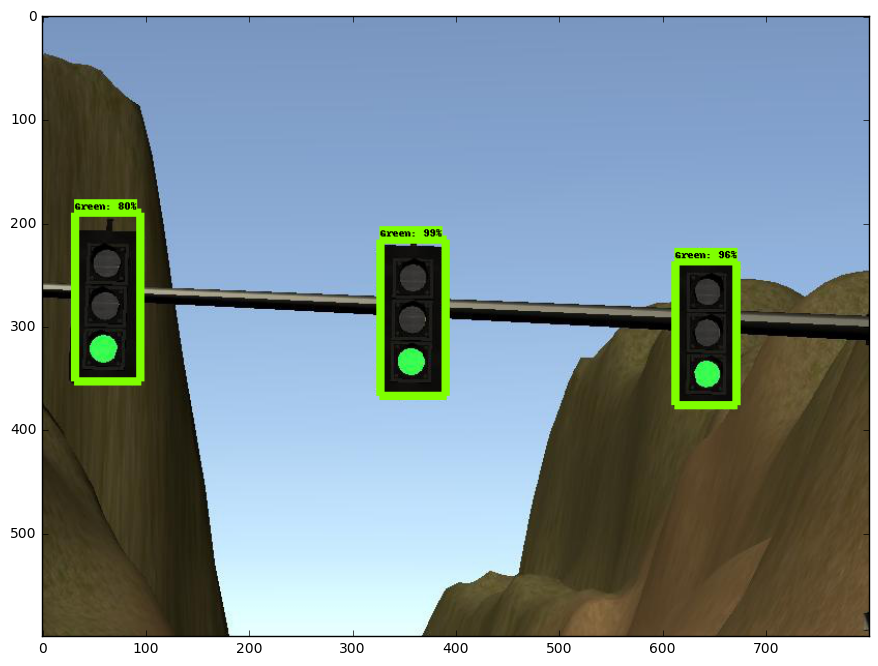

In [20]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
    
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

The model has perfect detections in all images except image #1 and image #11. In the first image the model didn't detect two green lights that shown partially. In image #11 all lights are very small. But in both images the model detected at least one light correctly and this is sufficient for practical purposes. 